<a href="https://colab.research.google.com/github/Helsonfs/Estudos_data_science_cvirus/blob/main/Estudos_Data_Science_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd

In [84]:
confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
mortos = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recuperados = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [85]:
confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327


In [86]:
confirmados.shape

(279, 544)

In [87]:
confirmados['Country/Region']

0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
274               Vietnam
275    West Bank and Gaza
276                 Yemen
277                Zambia
278              Zimbabwe
Name: Country/Region, Length: 279, dtype: object

In [88]:
last_date = '7/11/21'

confirmados[last_date]

0      131586
1      132592
2      146064
3       14075
4       39958
        ...  
274     30478
275    315160
276      6948
277    175729
278     67765
Name: 7/11/21, Length: 279, dtype: int64

In [89]:
confirmados['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [90]:
confirmados.sample(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21
55,NaN,Central African Republic,6.611100,20.939400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7091,7091,7101,7101,7101,7101,7101,7101,7101,7101,7101,7101,7101,7101,7101,7101,7129,7137,7139,7139,7139,7139,7139,7141,7141,7141,7141,7141,7141,7141,7141,7141,7141,7142,7142,7142,7142,7142,7142,7142
70,Hong Kong,China,22.300000,114.200000,0,2,2,5,8,8,8,10,10,12,13,15,15,17,21,24,25,26,29,38,49,50,53,56,56,57,60,62,63,68,68,69,74,79,84,91,...,11851,11858,11865,11868,11872,11874,11874,11877,11877,11878,11880,11881,11881,11884,11885,11886,11889,11896,11898,11905,11909,11911,11917,11920,11921,11923,11927,11938,11939,11942,11943,11944,11945,11948,11949,11950,11951,11951,11952,11955
37,NaN,Cambodia,11.550000,104.916700,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,33613,34244,34833,35511,36240,36666,37321,37959,38427,38969,39464,40157,40782,41581,42052,42711,43446,44124,44711,45366,46065,46810,47649,48532,49255,50385,51384,52350,53298,54291,55187,56122,57103,58057,59045,59978,60959,61870,62700,63615
89,Xinjiang,China,41.112900,85.240100,0,2,2,3,4,5,10,13,14,17,18,21,24,29,32,36,39,42,45,49,55,59,63,65,70,71,75,76,76,76,76,76,76,76,76,76,...,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980,980
184,NaN,Micronesia,7.425600,150.550800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
43,Manitoba,Canada,53.760900,-98.813900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52531,52751,52919,53153,53403,53650,53872,54163,54357,54481,54596,54739,54915,55098,55238,55331,55405,55467,55589,55692,55777,55879,55975,56036,56097,56167,56167,56306,56353,56417,56482,56516,56586,56667,56739,56826,56889,56920,56943,56987
230,NaN,Singapore,1.283300,103.833300,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,...,62176,62196,62210,62219,62223,62236,62245,62263,62276,62301,62315,62339,62366,62382,62403,62414,62430,62448,62470,62493,62513,62530,62544,62553,62563,62579,62589,62599,62606,62617,62630,62640,62652,62668,62678,62684,62692,62718,62744,62804
159,NaN,Kiribati,-3.370400,-168.734000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
162,NaN,Kuwait,29.311660,47.481766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11,26,...,315900,317197,318676,320257,321648,323357,325014,326451,327963,329526,331013,332570,334216,335874,337371,339032,340967,342929,344799,346560,348262,349923,351481,353133,354851,356687,358511,360406,362018,363672,365649,367642,369227,370932,372549,374104,375594,377364,379076,380699
210,NaN,Paraguay,-23.442500,-58.443800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,371021,373165,375996,379131,382231,384989,387687,389650,391436,393482,396149,398761,401243,403392,405075,406220,407721,409467,411615,413457,415320,416843,418330,419764,421589,423282,424998,426318,427542,428743,429884,431367,432801,434264,435522,436624,437719,438764,439897,441056


In [91]:
confirmados.set_index('Province/State').loc['Anhui']

Country/Region      China
Lat               31.8257
Long              117.226
1/22/20                 1
1/23/20                 9
                   ...   
7/10/21              1008
7/11/21              1008
7/12/21              1008
7/13/21              1008
7/14/21              1008
Name: Anhui, Length: 543, dtype: object

In [92]:
confirmados.set_index('Province/State').iloc[1]

Country/Region    Albania
Lat               41.1533
Long              20.1683
1/22/20                 0
1/23/20                 0
                   ...   
7/10/21            132587
7/11/21            132592
7/12/21            132597
7/13/21            132608
7/14/21            132616
Name: nan, Length: 543, dtype: object

In [93]:
# valor palso pois é muito grande, não valos considerar essa análise pois há varios campos vazios (muita disparidade no padrão)

confirmados['Country/Region'].value_counts() 

China             34
Canada            16
France            12
United Kingdom    12
Australia          8
                  ..
El Salvador        1
Zambia             1
Nigeria            1
Cabo Verde         1
Laos               1
Name: Country/Region, Length: 195, dtype: int64

In [94]:
confirmados_por_pais = confirmados.groupby('Country/Region').sum()
confirmados_por_pais.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327


In [95]:
confirmados_por_pais.sample(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Eritrea,15.179400,39.782300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4427,4427,4499,4597,4690,4766,4848,4848,4848,4981,5012,5108,5194,5285,5336,5362,5421,5508,5603,5664,5720,5780,5780,5884,5936,6009,6028,6051,6074,6088,6127,6188,6224,6242,6259,6277,6284,6284,6327,6347
Tajikistan,38.861000,71.276100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13308,13308,13308,13308,13308,13308,13308,13308,13308,13308,13308,13308,13308,13308,13308,13308,13308,13308,13358,13358,13392,13415,13439,13460,13478,13499,13523,13523,13569,13597,13623,13623,13690,13719,13753,13796,13834,13868,13911,13958
Armenia,40.069100,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,223143,223180,223212,223285,223384,223460,223555,223643,223682,223723,223805,223904,224000,224086,224167,224227,224253,224330,224430,224533,224635,224728,224797,224851,224967,225095,225221,225339,225464,225553,225606,225661,225801,225987,226135,226285,226388,226459,226597,226756
Gambia,13.443200,-15.310100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5999,5999,6002,6002,6002,6002,6008,6008,6008,6016,6016,6024,6024,6024,6024,6024,6045,6045,6045,6054,6065,6069,6069,6069,6079,6079,6079,6079,6079,6079,6116,6116,6116,6183,6183,6282,6282,6328,6414,6521
Saudi Arabia,23.885942,45.079162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,456562,457546,458707,459968,461242,461242,463703,464780,465797,466906,468175,469414,470723,471959,473112,474191,475403,476882,478135,479390,480702,482003,483221,484539,486106,486106,486106,490464,491612,492785,494032,495309,496516,497773,498906,500083,501195,501195,503734,503734
South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10688,10688,10688,10688,10688,10688,10688,10688,10688,10688,10688,10759,10764,10770,10770,10770,10786,10786,10786,10812,10812,10812,10812,10824,10834,10834,10846,10866,10866,10866,10879,10879,10886,10891,10891,10891,10891,10891,10911,10917
Pakistan,30.375300,69.345100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,4,...,932140,933630,935013,936131,937434,938737,939931,941170,942189,943027,944065,945184,946227,947218,947218,949175,949838,950768,951865,952907,953842,954743,955657,956392,957371,958408,959685,961085,962313,963660,964490,966007,967633,969476,971304,973284,975092,976867,978847,981392
Saint Vincent and the Grenadines,12.984300,-61.287200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2068,2076,2076,2092,2092,2132,2132,2147,2156,2156,2158,2172,2178,2183,2192,2195,2196,2207,2207,2216,2216,2218,2219,2219,2225,2225,2227,2229,2229,2233,2238,2240,2240,2240,2241,2241,2242,2245,2245,2249
Turkey,38.963700,35.243300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5282594,5287980,5293627,5300236,5306690,5313098,5319359,5325435,5330447,5336073,5342028,5348249,5354153,5359728,5365208,5370299,5375593,5381736,5387545,5393248,5398878,5404144,5409027,5414310,5420156,5425652,5430940,5435831,5440368,5444786,5449464,5454763,5459923,5465094,5470764,5476294,5481555,5486959,5493244,5500151


In [96]:
confirmados_por_pais.loc['China'][2:]

1/22/20       548.0
1/23/20       643.0
1/24/20       920.0
1/25/20      1406.0
1/26/20      2075.0
             ...   
7/10/21    104020.0
7/11/21    104072.0
7/12/21    104101.0
7/13/21    104126.0
7/14/21    104157.0
Name: China, Length: 540, dtype: float64

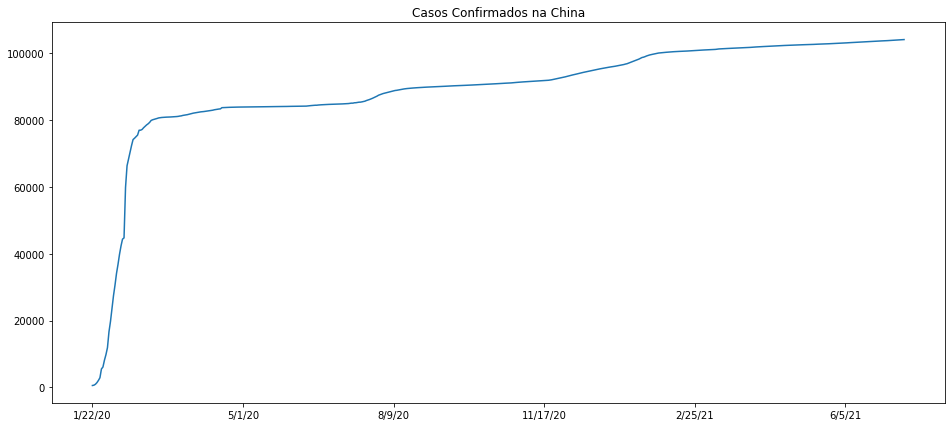

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,7))
confirmados_por_pais.loc['China'][2:].plot()
plt.title('Casos Confirmados na China')
plt.show()

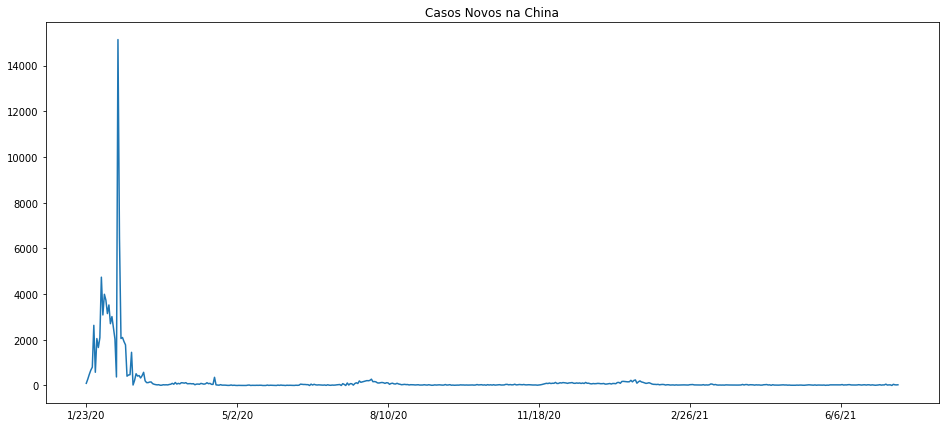

In [98]:
plt.figure(figsize=(16,7))
plt.title('Casos Novos na China')
novos_casos_china = confirmados_por_pais.loc['China'][2:].diff().dropna()
novos_casos_china.plot()

Text(0.5, 1.0, 'Confirmados por país')

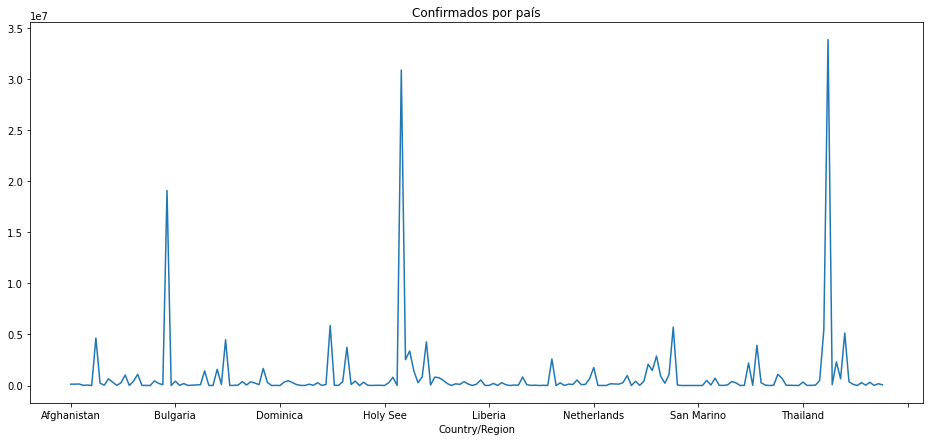

In [99]:
plt.figure(figsize=(16,7))
confirmados_por_pais[last_date].plot()
plt.title('Confirmados por país')

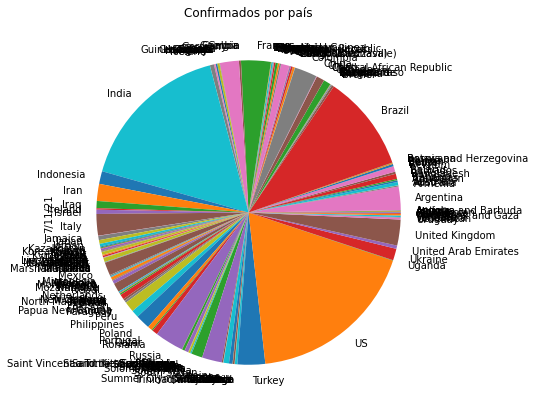

In [100]:
plt.figure(figsize=(16,7))
confirmados_por_pais[last_date].plot(kind = 'pie')
plt.title('Confirmados por país')
plt.show()

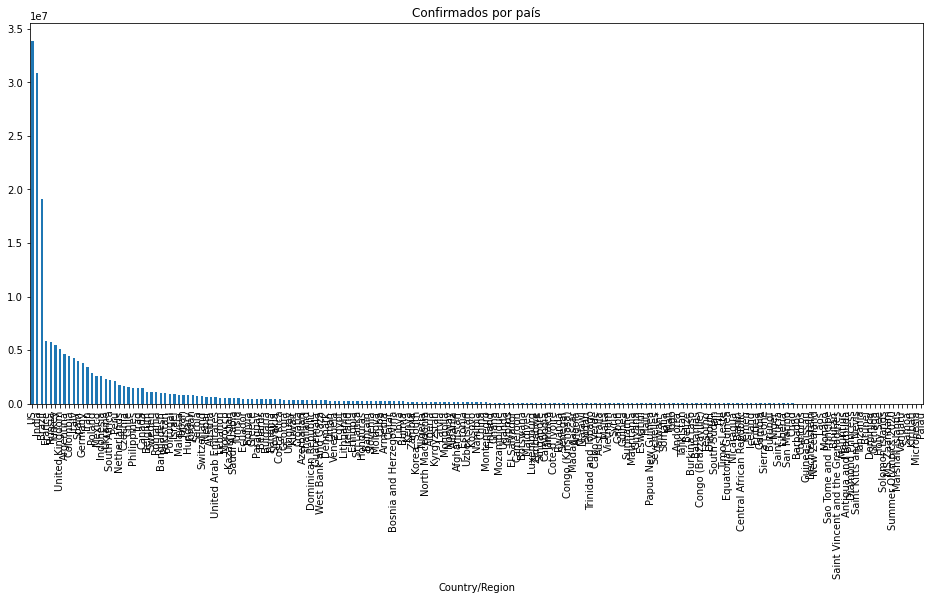

In [101]:
plt.figure(figsize=(16,7))
confirmados_por_pais[last_date].sort_values(ascending = False).plot(kind = 'bar')
plt.title('Confirmados por país')
plt.show()

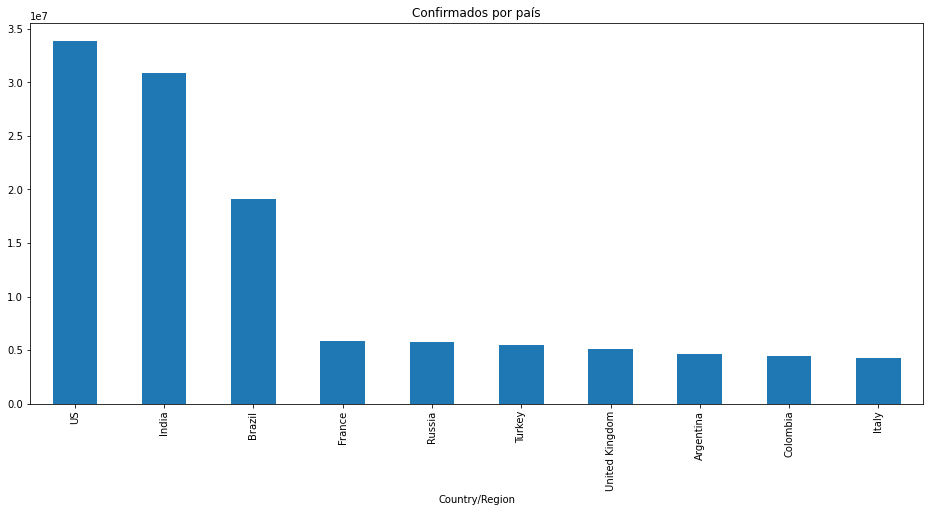

In [102]:
plt.figure(figsize=(16,7))
confirmados_por_pais[last_date].sort_values(ascending = False)[:10].plot(kind = 'bar')
plt.title('Confirmados por país')
plt.show()

In [103]:
display(mortos.head())
display(recuperados.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3104,3145,3187,3251,3305,3356,3412,3449,3527,3612,3683,3683,3842,3934,3934,3934,4215,4293,4366,4452,4519,4519,4519,4730,4794,4871,4962,4962,4962,4962,5283,5360,5415,5477,5561,5561,5561,5791,5791,5923
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2451,2451,2452,2452,2452,2452,2453,2453,2453,2453,2454,2454,2454,2454,2454,2454,2454,2455,2455,2455,2455,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3510,3518,3527,3537,3544,3552,3560,3565,3571,3579,3588,3598,3605,3615,3624,3631,3641,3650,3660,3669,3678,3685,3693,3699,3708,3716,3726,3735,3745,3755,3765,3775,3786,3798,3811,3824,3836,3851,3867,3882
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,794,797,800,803,811,815,819,825,831,836,842,847,851,853,856,859,868,875,878,881,883,887,889,891,894,900,903,906,910,913,915,920,925,925,928,929,935,939,941,946


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,58265,58622,58998,59569,59871,60280,60598,60939,61410,61706,61820,62397,62698,63426,63875,64401,65071,65565,66102,66799,67183,67483,68288,69205,70016,71012,71924,72700,73635,74480,75314,76218,77280,78521,79446,80226,81077,82586,82586,82586
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129627,129664,129702,129736,129761,129785,129807,129826,129842,129865,129879,129888,129895,129903,129910,129918,129918,129941,129955,129966,129975,129982,129990,129994,130002,130009,130014,130018,130023,130027,130029,130033,130035,130037,130043,130047,130050,130052,130053,130059
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,90995,91198,91413,91651,91894,92132,92384,92620,92852,93094,93355,93586,93831,94093,94336,94571,94822,95084,95331,95599,95878,96108,96335,96572,96815,97089,97380,97701,98031,98387,98748,99101,99510,99931,100383,100911,101430,102010,102594,103192
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13527,13527,13557,13557,13569,13578,13591,13591,13591,13618,13626,13633,13640,13650,13650,13650,13665,13665,13688,13694,13697,13697,13697,13697,13717,13720,13721,13721,13721,13721,13721,13752,13757,13760,13770,13770,13770,13787,13796,13796
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28866,28880,29329,29368,29553,29960,30101,30207,30282,30359,30775,31003,31105,31569,31589,31676,31782,32003,32322,32340,32605,32696,32791,32819,33079,33242,33271,33375,33514,33669,33739,34019,34047,34100,34169,34298,34327,34357,34500,34584


In [104]:
confirmados.groupby('Country/Region').sum()[last_date].head()

Country/Region
Afghanistan    131586
Albania        132592
Algeria        146064
Andorra         14075
Angola          39958
Name: 7/11/21, dtype: int64

In [105]:
mortos.groupby('Country/Region').sum()[last_date].head()

Country/Region
Afghanistan    5561
Albania        2456
Algeria        3836
Andorra         127
Angola          935
Name: 7/11/21, dtype: int64

In [106]:
recuperados.groupby('Country/Region').sum()[last_date].head()

Country/Region
Afghanistan     81077
Albania        130050
Algeria        101430
Andorra         13770
Angola          34327
Name: 7/11/21, dtype: int64

In [107]:
def latest_por_pais(data):
  return data.groupby('Country/Region').sum().iloc[:,-1]

latest_por_pais(confirmados).head()

Country/Region
Afghanistan    136643
Albania        132616
Algeria        148797
Andorra         14167
Angola          40327
Name: 7/14/21, dtype: int64

In [108]:
def latest_por_pais_por_data(data, date):
  return data.groupby('Country/Region').sum()[date]


In [109]:
informacoes2 = [latest_por_pais_por_data(confirmados, '2/20/20'), latest_por_pais_por_data(mortos, '2/20/20'), latest_por_pais_por_data(recuperados, '2/20/20')]
combinados_2_20_20 = pd.concat(informacoes, axis=1)
combinados_2_20_20.columns = ['confirmados', 'mortos', 'recuperados']


sum_up = combinados_2_20_20.loc['China']
letality_rate_1 = sum_up['mortos'] / sum_up['confirmados']
letality_rate_2 = sum_up['mortos'] / (sum_up['mortos'] + sum_up['recuperados'])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)


4.654511938707913
4.680666183924692


In [110]:
display(sum_up)

confirmados    104157
mortos           4848
recuperados     98727
Name: China, dtype: int64

In [111]:
combinados = pd.concat(informacoes, axis=1)
combinados.columns = ['confirmados', 'mortos', 'recuperados']
combinados.head()

,confirmados,mortos,recuperados
Country/Region,,,
Afghanistan,136643,5923,82586
Albania,132616,2456,130059
Algeria,148797,3882,103192
Andorra,14167,127,13796
Angola,40327,946,34584


In [112]:
sum_up = combinados.sum()
letality_rate_1 = sum_up['mortos'] / sum_up['confirmados']
letality_rate_2 = sum_up['mortos'] / (sum_up['mortos'] + sum_up['recuperados'])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.154492137332118
3.1661937116540675


In [113]:
letality_rate_1 = combinados['mortos'] / combinados['confirmados'] * 100
letality_rate_2 = combinados['mortos'] / (combinados['mortos'] + combinados['recuperados']) * 100
combinados['letality_rate_1'] = letality_rate_1
combinados['letality_rate_2'] = letality_rate_2
combinados.head()

,confirmados,mortos,recuperados,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,136643,5923,82586,4.334653,6.691975
Albania,132616,2456,130059,1.851964,1.853375
Algeria,148797,3882,103192,2.608924,3.625530
Andorra,14167,127,13796,0.896449,0.912160
Angola,40327,946,34584,2.345823,2.662539


In [114]:
combinados.sort_values('letality_rate_1', ascending=False).head()

,confirmados,mortos,recuperados,letality_rate_1,letality_rate_2
Country/Region,,,,,
Vanuatu,4,1,3,25.000000,25.000000
MS Zaandam,9,2,7,22.222222,22.222222
Yemen,6964,1366,4151,19.615164,24.759833
Peru,2085883,194752,2047805,9.336669,8.684372
Mexico,2616827,235507,2061595,8.999716,10.252353


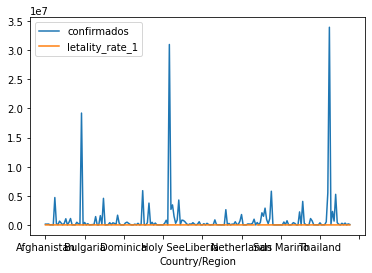

In [115]:
combinados[['confirmados', 'letality_rate_1']].plot()

In [116]:
import seaborn as sns

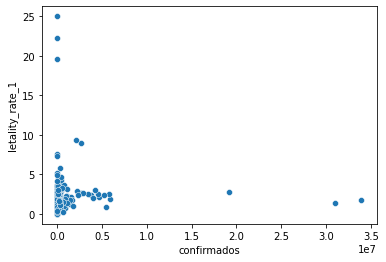

In [117]:
sns.scatterplot(data=combinados, x='confirmados', y='letality_rate_1')

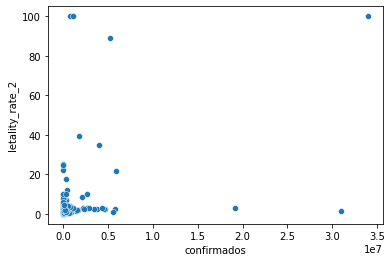

In [118]:
sns.scatterplot(data=combinados, x='confirmados', y='letality_rate_2')

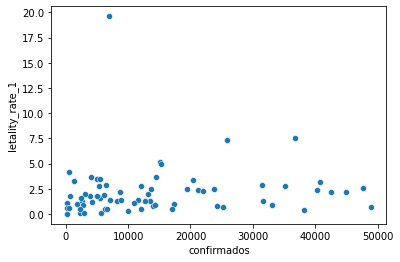

In [119]:
sns.scatterplot(data=combinados.query('confirmados > 40 and confirmados < 50000'), x='confirmados', y='letality_rate_1')

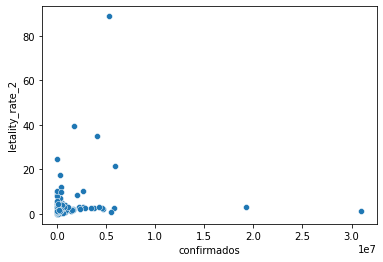

In [120]:
sns.scatterplot(data=combinados.query('recuperados > 40'), x='confirmados', y='letality_rate_2')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


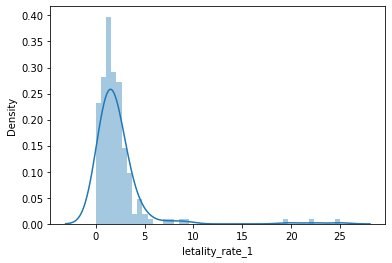

In [121]:
sns.distplot(combinados['letality_rate_1'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


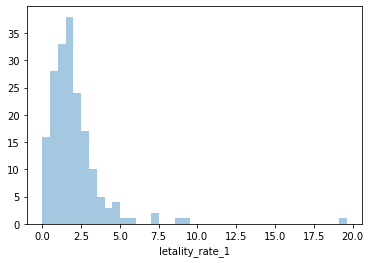

In [122]:
sns.distplot(combinados.query('confirmados > 40')['letality_rate_1'], kde=False)

In [123]:
combinados.sort_values('letality_rate_1', ascending=False).query('confirmados > 40').head(10)

,confirmados,mortos,recuperados,letality_rate_1,letality_rate_2
Country/Region,,,,,
Yemen,6964,1366,4151,19.615164,24.759833
Peru,2085883,194752,2047805,9.336669,8.684372
Mexico,2616827,235507,2061595,8.999716,10.252353
Sudan,36805,2774,30647,7.537019,8.300171
Syria,25806,1901,21896,7.366504,7.988402
Egypt,283409,16418,220530,5.793041,6.928946
Somalia,15076,781,7267,5.180419,9.704274
Taiwan*,15328,753,11964,4.912578,5.921208
Bosnia and Herzegovina,205238,9664,186382,4.708680,4.929455


In [124]:
combinados.sort_values('letality_rate_2', ascending=False).query('recuperados > 40').head(10)

,confirmados,mortos,recuperados,letality_rate_1,letality_rate_2
Country/Region,,,,,
United Kingdom,5252655,128797,16127,2.452036,88.872098
Netherlands,1783082,18055,27490,1.012573,39.642112
Spain,4041474,81043,150376,2.005283,35.020029
Yemen,6964,1366,4151,19.615164,24.759833
France,5884395,111609,407965,1.896695,21.480867
Ireland,279790,5018,23364,1.793488,17.680220
Greece,447718,12789,93764,2.856486,12.002478
Tanzania,509,21,183,4.125737,10.294118
Mexico,2616827,235507,2061595,8.999716,10.252353


In [125]:
informacoes3 = [latest_por_pais_por_data(confirmados, '2/8/20'), latest_por_pais_por_data(mortos, '2/20/20'), latest_por_pais_por_data(recuperados, '2/20/20')]
combinados_12 = pd.concat(informacoes, axis=1)
combinados_12.columns = ['confirmados', 'mortos', 'recuperados']

sum_up = combinados_12.loc['China']
letality_rate_3 = sum_up['mortos'] / sum_up['confirmados']

print(letality_rate_3 * 100)

4.654511938707913


# Segunda parte

In [132]:
confirmados.set_index('Country/Region').loc['China'].sum().tail()

7/10/21    104020
7/11/21    104072
7/12/21    104101
7/13/21    104126
7/14/21    104157
dtype: object

In [134]:
e_china = confirmados['Country/Region'] == 'China'
e_china.head()

0    False
1    False
2    False
3    False
4    False
Name: Country/Region, dtype: bool

In [136]:
confirmados['e_china'] = e_china
display(confirmados.head())
display(confirmados.tail())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,e_china
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643,False
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,False
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,False
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,False
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,False


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,e_china
274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,8791,9027,9222,9635,9835,10048,10337,10630,10881,11304,11794,12150,12508,12978,13258,13530,13782,13989,14323,14537,15325,15740,16136,16507,17052,17727,18121,19310,20261,21312,22341,23385,24810,26608,28470,30478,32665,35409,38239,False
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,310026,310026,310544,310544,311018,311018,311018,311534,311690,311948,312164,312334,312499,312605,312673,312811,313015,313015,313015,313520,313520,313721,313851,313851,314167,314288,314409,314492,314569,314569,314780,314869,314869,315047,315107,315160,315224,315224,315409,False
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6787,6812,6823,6832,6836,6856,6857,6862,6863,6864,6867,6869,6875,6877,6885,6889,6892,6898,6905,6905,6906,6908,6909,6918,6920,6923,6924,6926,6929,6929,6931,6934,6936,6940,6941,6948,6952,6961,6964,False
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,100278,100765,101996,103763,105909,107974,110332,111746,113134,115824,118850,122244,125157,126973,129033,130631,133659,137026,140620,143215,146031,148568,149661,152056,154948,157832,160613,162487,164282,165513,167132,169003,170456,172405,174789,175729,176742,178748,180549,False
278,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39189,39238,39321,39432,39496,39688,39852,39959,40077,40318,40556,40927,41335,41628,41779,42195,42714,43480,44306,45217,46018,46442,47284,48533,49864,51221,52663,53665,54474,56014,57963,60227,62383,65066,66853,67765,70426,73271,76381,False


In [141]:
# query dos casos na China

confirmados.query('e_china == True')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,e_china
58,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1006,1006,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,True
59,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,1064,1065,1067,1067,1068,1069,1069,1070,1071,1071,1072,1072,1073,1073,1075,1075,1075,1075,1076,1076,1077,1079,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1079,1079,1079,True
60,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,601,601,601,601,601,601,601,601,601,601,True
61,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,629,631,632,632,635,636,637,637,638,638,641,646,650,651,652,659,660,661,661,665,669,672,675,677,680,685,686,688,688,689,690,692,692,692,692,696,698,699,700,True
62,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,True
63,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,...,2542,2564,2573,2582,2593,2605,2618,2625,2635,2650,2657,2666,2680,2692,2699,2706,2709,2717,2723,2727,2728,2733,2736,2737,2737,2745,2748,2751,2756,2759,2764,2766,2769,2770,2770,2774,2777,2779,2791,True
64,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,252,...,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,276,276,276,276,276,276,276,276,277,277,277,277,True
65,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,146,...,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,True
66,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,168,...,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,True
67,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,...,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,13

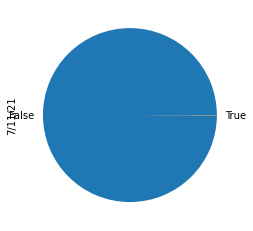

In [157]:
confirmados.groupby('e_china').sum()[last_date].plot(kind='pie')

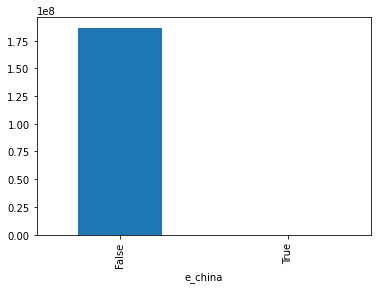

In [158]:
confirmados.groupby('e_china').sum()[last_date].plot(kind='bar')

## No dia 02/03/2020 China tinha 8 vezes o número de casos que o resto do mundo.

In [159]:
import numpy as np

In [160]:
confirmados['e_china_label'] = np.where(confirmados['e_china'], 'China', 'Outros')
display(confirmados.head())
display(confirmados.tail())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,e_china,e_china_label
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,80841,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643,False,Outros
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132384,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,False,Outros
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,131283,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,False,Outros
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13777,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,False,Outros
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35854,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,False,Outros


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,e_china,e_china_label
274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,9027,9222,9635,9835,10048,10337,10630,10881,11304,11794,12150,12508,12978,13258,13530,13782,13989,14323,14537,15325,15740,16136,16507,17052,17727,18121,19310,20261,21312,22341,23385,24810,26608,28470,30478,32665,35409,38239,False,Outros
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,310026,310544,310544,311018,311018,311018,311534,311690,311948,312164,312334,312499,312605,312673,312811,313015,313015,313015,313520,313520,313721,313851,313851,314167,314288,314409,314492,314569,314569,314780,314869,314869,315047,315107,315160,315224,315224,315409,False,Outros
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6812,6823,6832,6836,6856,6857,6862,6863,6864,6867,6869,6875,6877,6885,6889,6892,6898,6905,6905,6906,6908,6909,6918,6920,6923,6924,6926,6929,6929,6931,6934,6936,6940,6941,6948,6952,6961,6964,False,Outros
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,100765,101996,103763,105909,107974,110332,111746,113134,115824,118850,122244,125157,126973,129033,130631,133659,137026,140620,143215,146031,148568,149661,152056,154948,157832,160613,162487,164282,165513,167132,169003,170456,172405,174789,175729,176742,178748,180549,False,Outros
278,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39238,39321,39432,39496,39688,39852,39959,40077,40318,40556,40927,41335,41628,41779,42195,42714,43480,44306,45217,46018,46442,47284,48533,49864,51221,52663,53665,54474,56014,57963,60227,62383,65066,66853,67765,70426,73271,76381,False,Outros


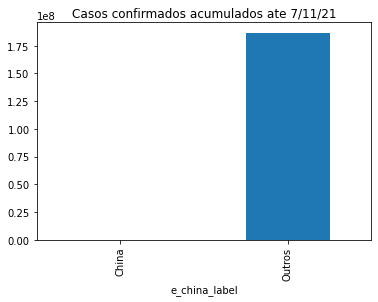

In [163]:
confirmados.groupby('e_china_label').sum()[last_date].plot(kind='bar')
plt.title(f'Casos confirmados acumulados ate {last_date}')
plt.show()

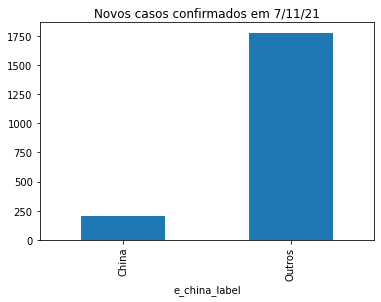

In [164]:
soma = confirmados.groupby('e_china_label').sum()
soma['delta'] = soma['3/2/20'] - soma['3/1/20']
soma['delta'].plot(kind='bar')
plt.title(f'Novos casos confirmados em {last_date}')
plt.show()

In [167]:
soma.T.head()

e_china_label,China,Outros
Lat,1085.2923,4539.266250
Long,3688.9377,2543.589914
1/22/20,548.0000,9.000000
1/23/20,643.0000,12.000000
1/24/20,920.0000,21.000000


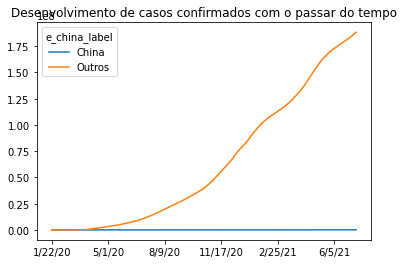

In [171]:
soma.T[2:-2].plot()
plt.title('Desenvolvimento de casos confirmados com o passar do tempo')
plt.show()

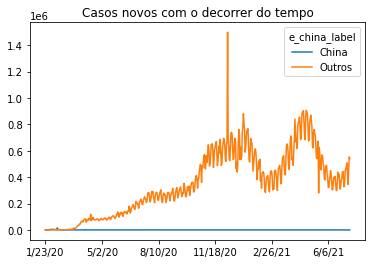

In [177]:
diferencas = soma.T[2:-2].diff().dropna()
diferencas.plot()
plt.title('Casos novos com o decorrer do tempo')
plt.show()